In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder


In [2]:
#  Step 1: Load Dataset
movies = pd.read_csv('IMDb Movies India.csv', encoding='latin1')


In [12]:
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  7919 non-null   object 
 3   Genre     7919 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7919 non-null   object 
 7   Actor 1   7919 non-null   object 
 8   Actor 2   7919 non-null   object 
 9   Actor 3   7919 non-null   object 
dtypes: float64(1), object(9)
memory usage: 680.5+ KB


In [43]:
movies.columns

Index(['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2',
       'Actor 3', 'Rating'],
      dtype='object')

In [14]:
movies.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# Data Cleaning & Preprocessing

In [16]:
# Remove duplicate rows
movies.drop_duplicates(inplace=True)

In [17]:
# Drop rows where Rating is missing (as it is our target variable)
movies.dropna(subset=['Rating'], inplace=True)


In [10]:
# Fill missing values in other columns
imputer = SimpleImputer(strategy='most_frequent')
movies[['Year', 'Duration', 'Votes']] = imputer.fit_transform(movies[['Year', 'Duration', 'Votes']])

# Define Features and Target Variable

In [18]:
features = ['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

In [30]:
movies = movies[features + [target]]

In [31]:
# Handle Missing Values
movies.dropna(inplace=True)

# Encode Categorical Features


In [44]:
# Rename Columns for Easier Access
movies.columns = movies.columns.str.strip().str.lower().str.replace(" ", "_")

In [45]:
# Fix Data Issues
movies['year'] = movies['year'].astype(str).str.extract(r'(\d{4})').astype(int)  # Extract Year
movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)  # Convert Duration to int
movies['votes'] = movies['votes'].astype(str).str.replace(',', '').astype(int)  # Remove commas from Votes


In [46]:
# Encode Categorical Columns
label_encoders = {}
for col in ['genre', 'director', 'actor_1', 'actor_2', 'actor_3']:
    if col in movies.columns:
        le = LabelEncoder()
        movies[col] = le.fit_transform(movies[col].astype(str))
        label_encoders[col] = le


In [47]:
# Print Cleaned Data
print(movies.head())

   year  duration  genre  votes  director  actor_1  actor_2  actor_3  rating
1  2019       109    188      8      2931     1782     2814      377     7.0
3  2019       110    121     35       834     1589      890     2572     4.4
5  1997       147     87    827      1120      508       85     2449     4.7
6  2005       142    259   1086      1828      931     1388     3029     7.4
8  2012        82    298    326       824     2520     1461     1205     5.6


# Split Data into Training & Testing Sets

In [48]:
# Features (Independent Variables)
X = movies.drop(columns=['rating'])  # Exclude 'rating' since it's the target


In [49]:
# Target Variable (Dependent Variable)
y = movies['rating']  # The column we want to predict

In [50]:
# Split into Train & Test Sets (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (6335, 8), Test Set: (1584, 8)


# Regression Model

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
# Initialize Model
model = LinearRegression()


In [55]:
# Train the Model
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict on Test Data
y_pred = model.predict(X_test)

In [57]:
# Evaluating Model Performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [58]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [59]:
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R² Score: {r2:.2f}")  # Closer to 1 = Better


 Mean Absolute Error (MAE): 1.04
 Mean Squared Error (MSE): 1.71
 R² Score: 0.08


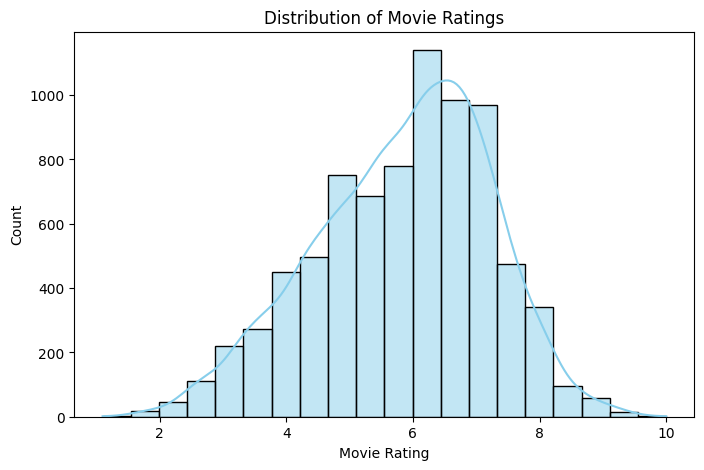

In [61]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(movies['rating'], bins=20, kde=True, color='skyblue')
plt.xlabel("Movie Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()

Insight: This helps understand the range of ratings and whether they are normally distributed.

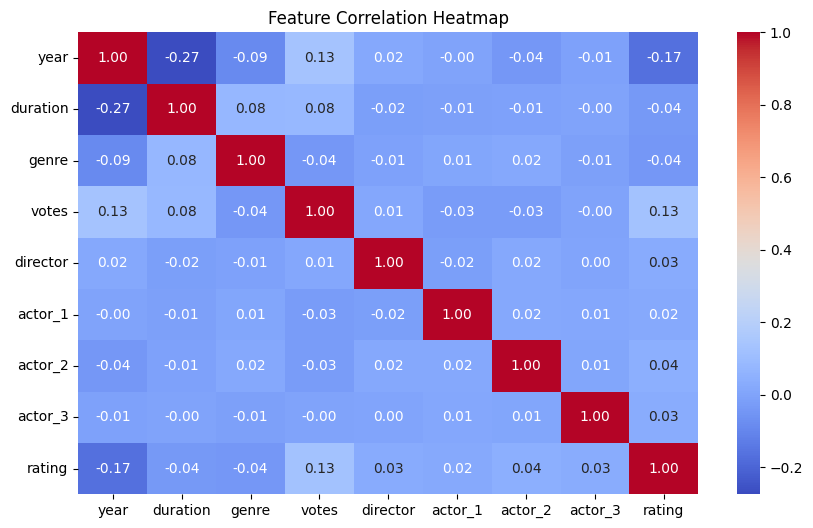

In [62]:
# Compute the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(movies.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Insight: Helps identify which features are strongly correlated with ratings.

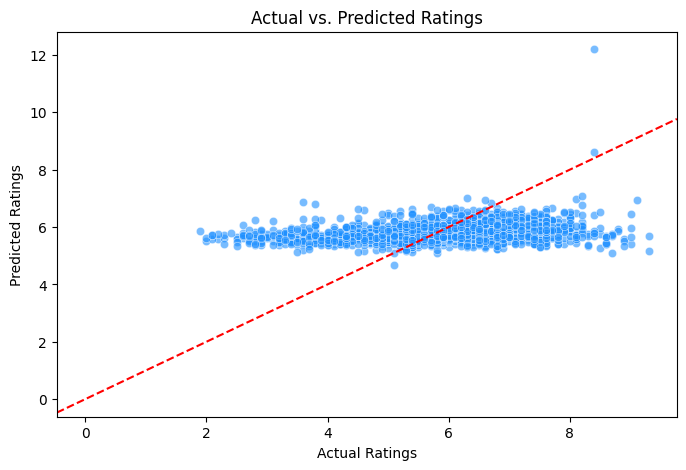

In [63]:
# Actual vs. Predicted Ratings (Scatter Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="dodgerblue", alpha=0.6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  # Ideal prediction line
plt.show()


Insight: If points are close to the red line, the model is performing well.

In [64]:
# Feature Importance (For Tree-Based Models)

from sklearn.ensemble import RandomForestRegressor

In [65]:
# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
# Get Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns


C:\Users\Dell\AppData\Local\Temp\ipykernel_2136\2718975714.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


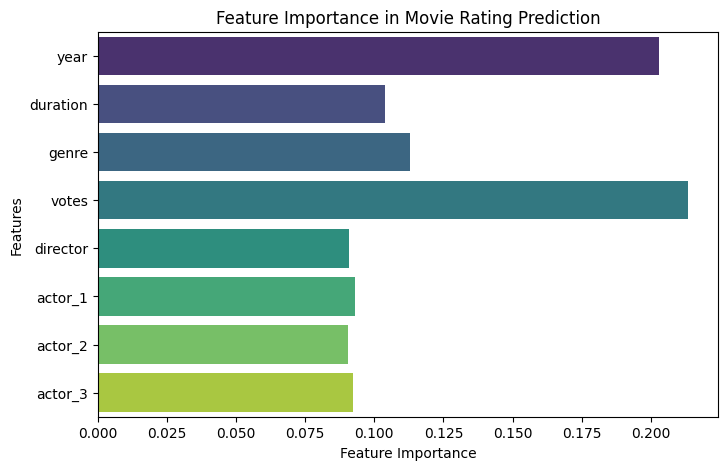

In [67]:
# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Movie Rating Prediction")
plt.show()

Insight: Helps understand which factors (genre, director, actors) influence ratings the most.